In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

keras = tf.keras
import tensorflow_datasets as tfds
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)


TRAIN_DIR = 'C:/Users/SoumyadipGhosh/Downloads/Car-Classification-master/dataset'
image_data = image_generator.flow_from_directory(TRAIN_DIR,
                                                shuffle=True,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 462 images belonging to 3 classes.


In [5]:
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')


9412608/9406464 [==============================] - ETA: 4: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 59 - ETA: 58 - ETA: 58 - ETA: 58 - ETA: 57 - ETA: 56 - ETA: 54 - ETA: 51 - ETA: 51 - ETA: 51 - ETA: 50 - ETA: 50 - ETA: 49 - ETA: 49 - ETA: 48 - ETA: 47 

In [8]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (14, 224, 224, 3)
Label batch shape:  (14, 3)


In [9]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(14, 7, 7, 1280)


In [10]:
base_model.trainable = False

In [11]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

block_4_expand_relu (ReLU)      (None, 28, 28, 192)  0           block_4_expand_BN[0][0]          
__________________________________________________________________________________________________
block_4_depthwise (DepthwiseCon (None, 28, 28, 192)  1728        block_4_expand_relu[0][0]        
__________________________________________________________________________________________________
block_4_depthwise_BN (BatchNorm (None, 28, 28, 192)  768         block_4_depthwise[0][0]          
__________________________________________________________________________________________________
block_4_depthwise_relu (ReLU)   (None, 28, 28, 192)  0           block_4_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_4_project (Conv2D)        (None, 28, 28, 32)   6144        block_4_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_4_pr

__________________________________________________________________________________________________
block_8_project (Conv2D)        (None, 14, 14, 64)   24576       block_8_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_8_project_BN (BatchNormal (None, 14, 14, 64)   256         block_8_project[0][0]            
__________________________________________________________________________________________________
block_8_add (Add)               (None, 14, 14, 64)   0           block_7_add[0][0]                
                                                                 block_8_project_BN[0][0]         
__________________________________________________________________________________________________
block_9_expand (Conv2D)         (None, 14, 14, 384)  24576       block_8_add[0][0]                
__________________________________________________________________________________________________
block_9_ex

__________________________________________________________________________________________________
block_13_expand_BN (BatchNormal (None, 14, 14, 576)  2304        block_13_expand[0][0]            
__________________________________________________________________________________________________
block_13_expand_relu (ReLU)     (None, 14, 14, 576)  0           block_13_expand_BN[0][0]         
__________________________________________________________________________________________________
block_13_pad (ZeroPadding2D)    (None, 15, 15, 576)  0           block_13_expand_relu[0][0]       
__________________________________________________________________________________________________
block_13_depthwise (DepthwiseCo (None, 7, 7, 576)    5184        block_13_pad[0][0]               
__________________________________________________________________________________________________
block_13_depthwise_BN (BatchNor (None, 7, 7, 576)    2304        block_13_depthwise[0][0]         
__________

In [12]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)


(14, 1280)


In [14]:
prediction_layer = keras.layers.Dense(image_data.num_classes, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)


(14, 3)


In [15]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [16]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [18]:
len(model.trainable_variables)

2

In [26]:
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)


history = model.fit_generator(image_data, epochs=5,
                              steps_per_epoch=steps_per_epoch,)

Epoch 1/5
15/15 [==============================] - ETA: 4:25 - loss: 0.7516 - accuracy: 0.66 - ETA: 3:41 - loss: 0.7530 - accuracy: 0.65 - ETA: 3:16 - loss: 0.7410 - accuracy: 0.68 - ETA: 3:01 - loss: 0.7383 - accuracy: 0.67 - ETA: 3:01 - loss: 0.7375 - accuracy: 0.67 - ETA: 2:49 - loss: 0.7337 - accuracy: 0.68 - ETA: 2:31 - loss: 0.7338 - accuracy: 0.68 - ETA: 2:11 - loss: 0.7340 - accuracy: 0.68 - ETA: 1:53 - loss: 0.7336 - accuracy: 0.68 - ETA: 1:34 - loss: 0.7310 - accuracy: 0.69 - ETA: 1:10 - loss: 0.7321 - accuracy: 0.68 - ETA: 52s - loss: 0.7320 - accuracy: 0.6867 - ETA: 35s - loss: 0.7294 - accuracy: 0.696 - ETA: 18s - loss: 0.7270 - accuracy: 0.703 - 272s 18s/step - loss: 0.7260 - accuracy: 0.7049
Epoch 2/5
15/15 [==============================] - ETA: 4:12 - loss: 0.7332 - accuracy: 0.61 - ETA: 4:15 - loss: 0.7248 - accuracy: 0.64 - ETA: 3:59 - loss: 0.7253 - accuracy: 0.66 - ETA: 3:46 - loss: 0.7188 - accuracy: 0.68 - ETA: 3:21 - loss: 0.7203 - accuracy: 0.68 - ETA: 2:56 - l

In [27]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Honda', 'Hyundai', 'Mercedes'], dtype='<U8')

In [28]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [29]:
label_id = np.argmax(label_batch, axis=-1)

IndexError: index 14 is out of bounds for axis 0 with size 14

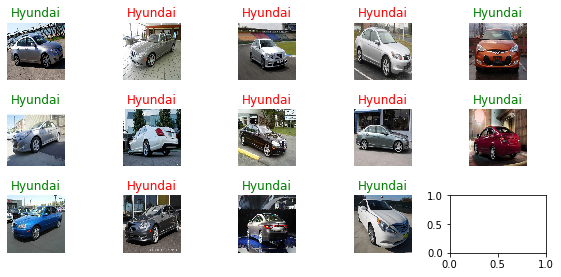

In [30]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")
